In [7]:
import polars as pl
import numpy as np
import os
import matplotlib.pyplot as plt
import emd
from dtw import *
from utils import *
from plotters import *

Noisy signal to clean signal

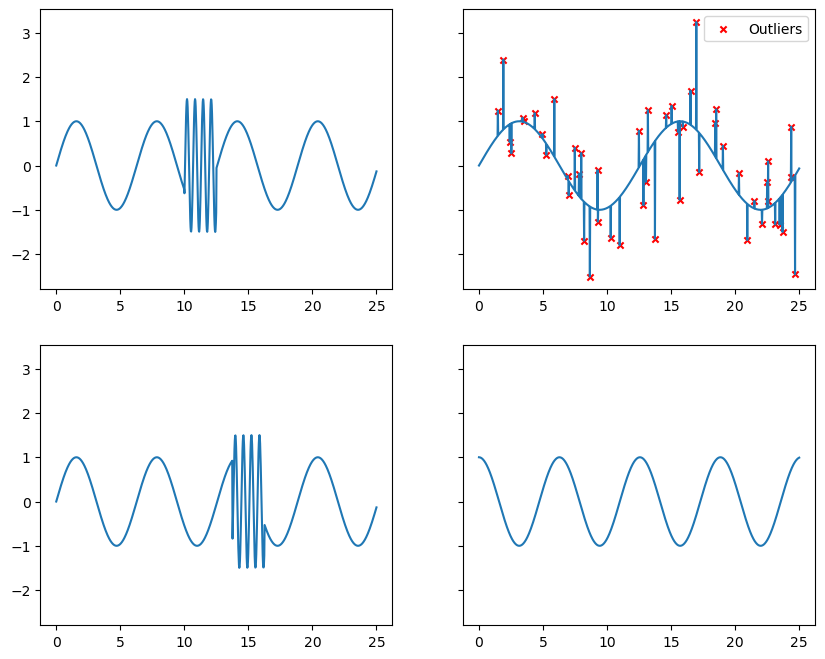

In [8]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate signal containing outliers
time = np.linspace(0, 25, 1000)
contaminated_signal = np.sin(time/2)
num_outliers = 50 # 5th bottom percentile of outliers
outliers_indices = np.random.choice(len(time), num_outliers, replace=False)
contaminated_signal[outliers_indices] += np.random.normal(0, 1, num_outliers)

# Generate clean, shifted signal
clean_signal = np.sin(time + np.pi / 2)

# Generate signals with sudden increase of frequency for a short period of time
freq_increase_duration = 100  # duration of frequency increase
freq_increase_start = 400  # start index of frequency increase

# Signal 1: sudden frequency increase
signal1 = np.sin(time)
signal1[freq_increase_start:freq_increase_start + freq_increase_duration] = 1.5 * np.sin(10 * time[freq_increase_start:freq_increase_start + freq_increase_duration])

# Signal 2: sudden frequency increase shifted in time
shift = 150  # shift amount
signal2 = np.sin(time)
signal2[freq_increase_start + shift:freq_increase_start + shift + freq_increase_duration] = 1.5 *np.sin(10 * time[freq_increase_start + shift:freq_increase_start + shift + freq_increase_duration])

# Plot the signals with frequency increase
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharey=True)
axes[0, 0].plot(time, signal1)
axes[1, 0].plot(time, signal2)
axes[0, 1].plot(time, contaminated_signal)
axes[0, 1].scatter(time[outliers_indices], contaminated_signal[outliers_indices], color='red', label='Outliers', marker='x', s=20)
axes[0, 1].legend()
axes[1, 1].plot(time, clean_signal)

<Axes: xlabel='Query index', ylabel='Reference index'>

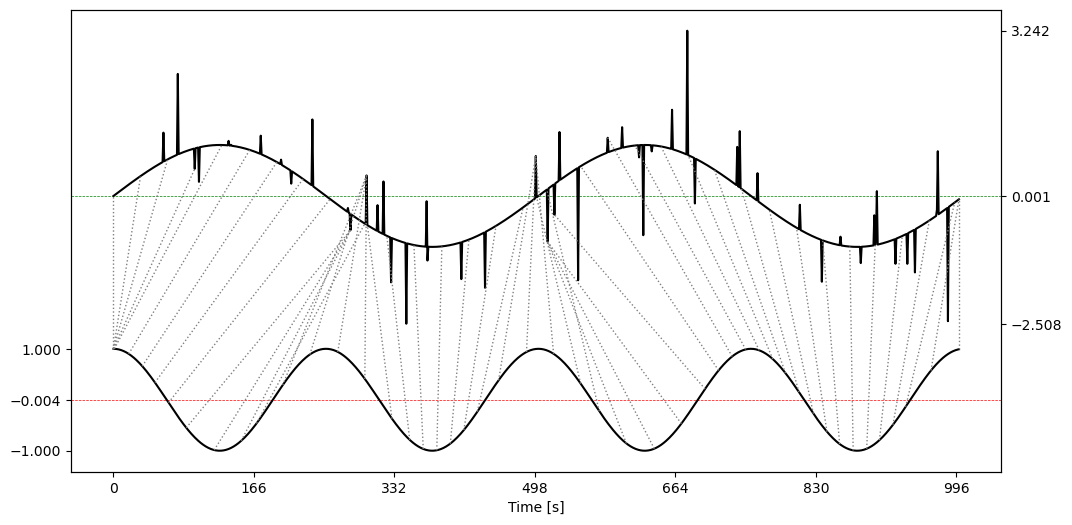

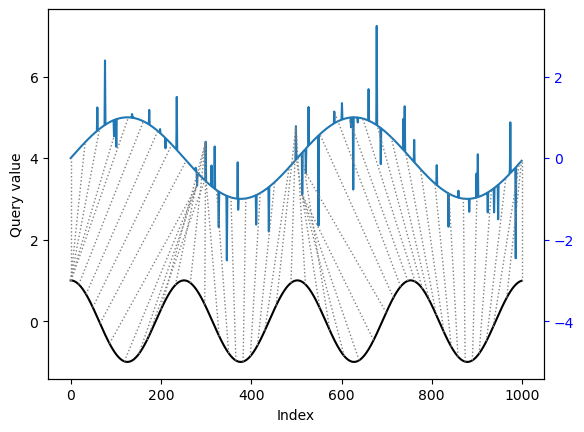

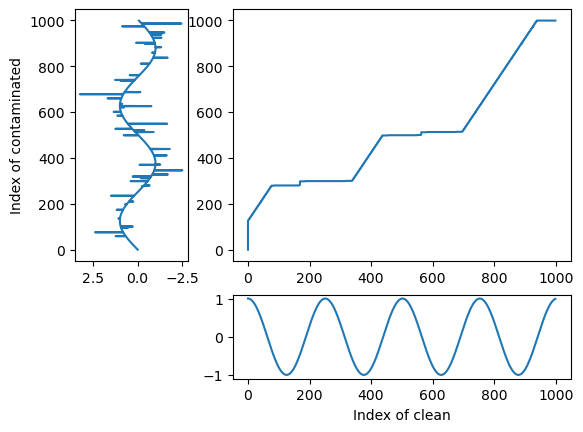

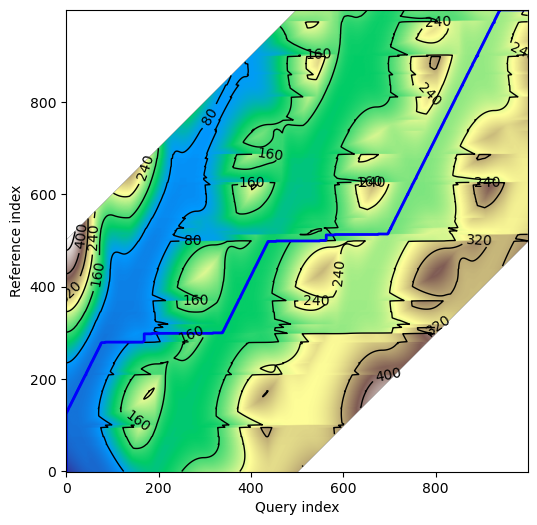

In [9]:
# Apply DTW to clean and contaminated signals
alignment = dtw(clean_signal, contaminated_signal, keep_internals=True, window_type=sakoeChibaWindow, window_args={'window_size': 500})
customDtwPlotTwoWay(alignment, offset=4, xlab="Time [s]")
alignment.plot(type="twoway", offset=4)
alignment.plot(type="threeway", xlab="Index of clean", ylab="Index of contaminated")
alignment.plot(type="density")

<Axes: >

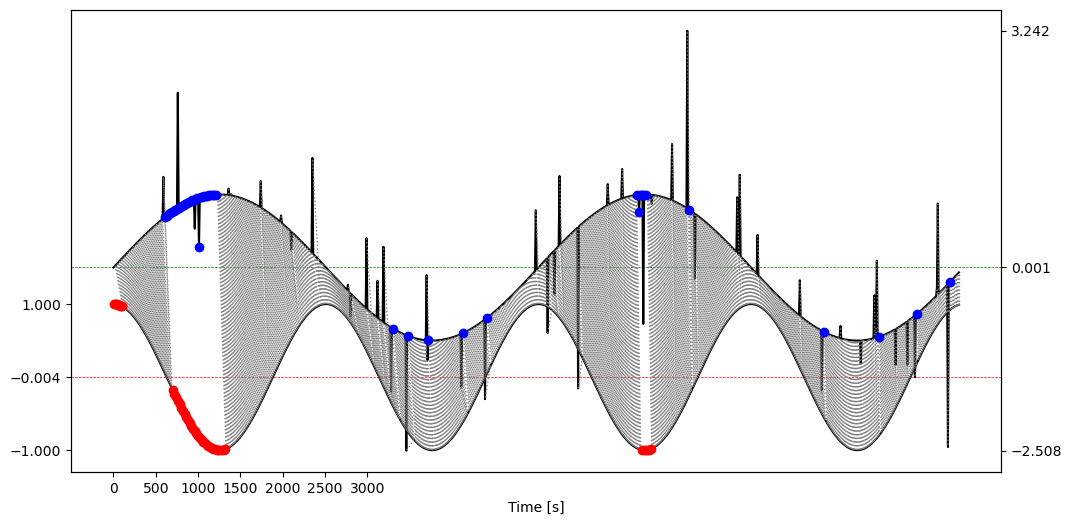

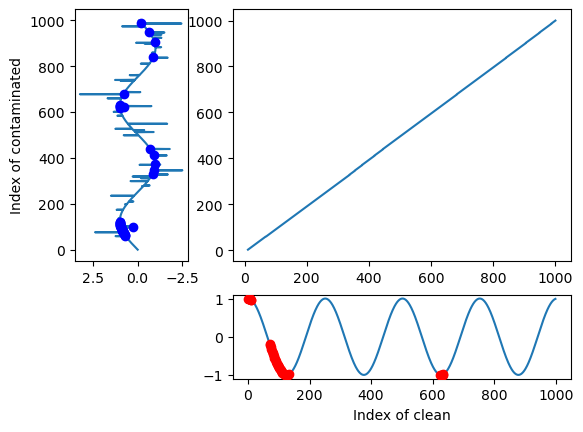

In [10]:
# Apply Drop-DTW
zx_costs, x_drop_costs, z_drop_costs = compute_all_costs(
    series1=clean_signal,
    series2=contaminated_signal,
    drop_cost_type="percentile",
    percentile=90
)
min_cost, matched_indices, dropped1, dropped2 = double_drop_dtw(
    costs=zx_costs,
    drop_costs1=x_drop_costs,
    drop_costs2=z_drop_costs,
    contiguous=True
)
dropDtwPlotTwoWay(
    xts=clean_signal,
    yts=contaminated_signal,
    xlab="Time [s]",
    offset=1.5,
    matched_indices=matched_indices,
    dropped1=dropped1,
    dropped2=dropped2
)
dropDtwPlotThreeWay(
    xts=clean_signal,
    yts=contaminated_signal,
    xlab="Index of clean",
    ylab="Index of contaminated",
    matched_indices=matched_indices,
    dropped1=dropped1,
    dropped2=dropped2
)

<Axes: >

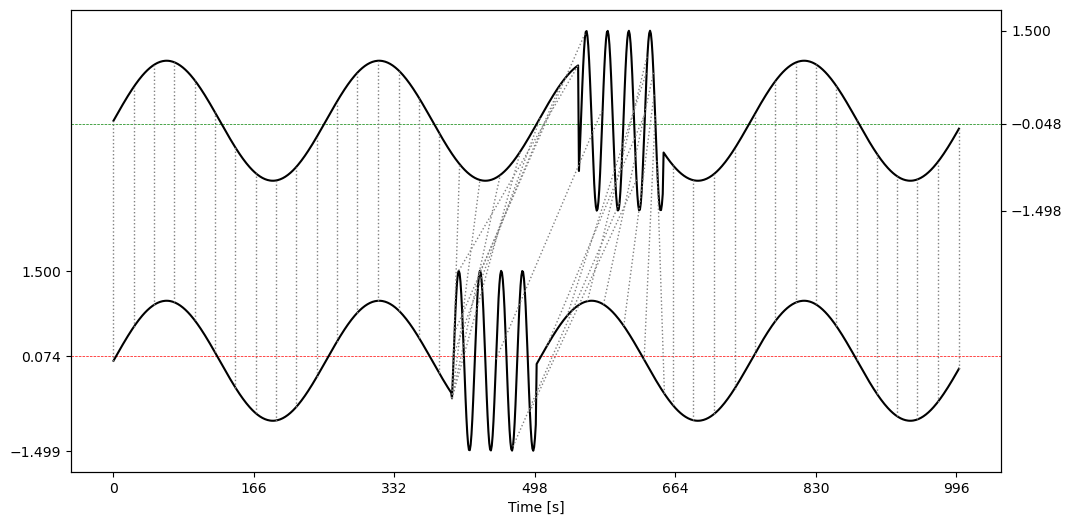

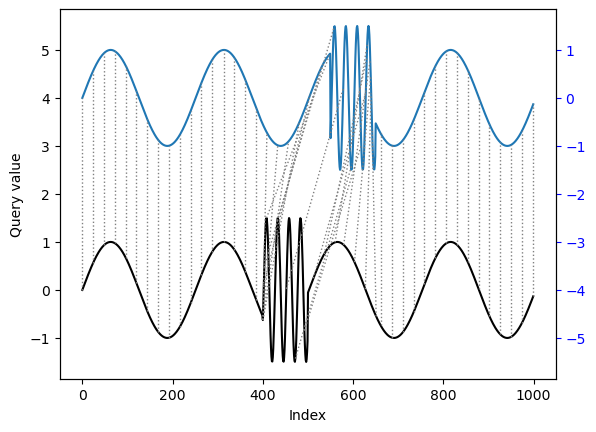

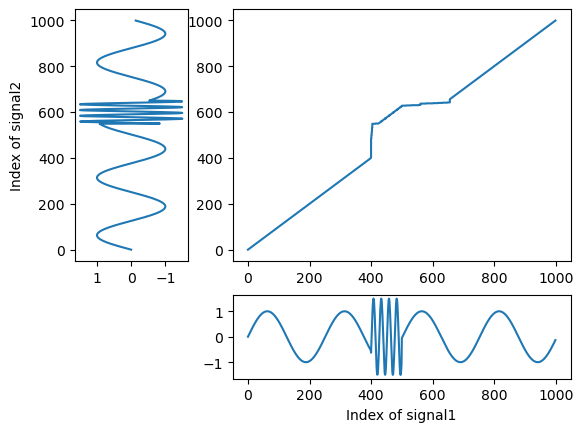

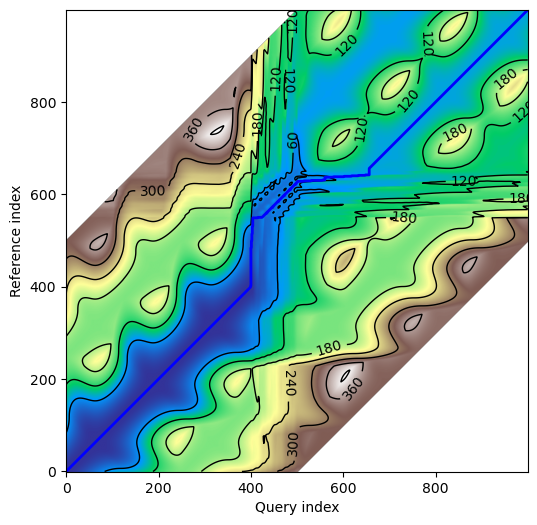

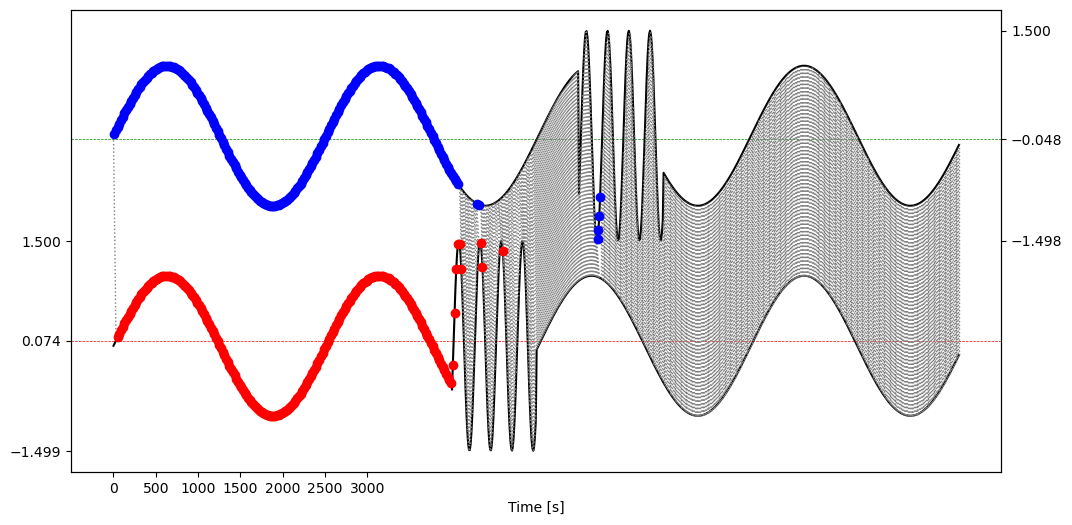

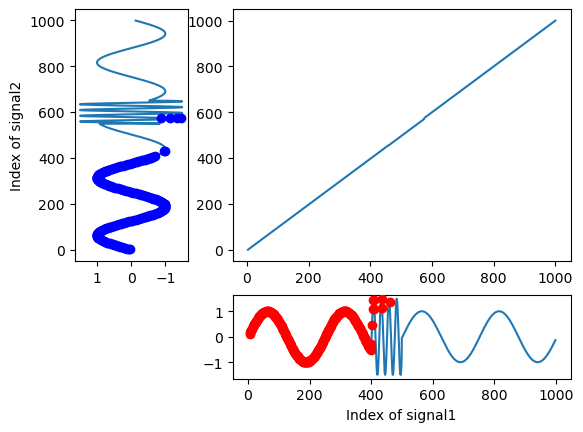

In [11]:
# Apply DTW to signal1 and signal2
alignment_12 = dtw(signal1, signal2, keep_internals=True, window_type=sakoeChibaWindow, window_args={'window_size': 500})
customDtwPlotTwoWay(alignment_12, offset=4, xlab="Time [s]")
alignment_12.plot(type="twoway", offset=4)
alignment_12.plot(type="threeway", xlab="Index of signal1", ylab="Index of signal2")
alignment_12.plot(type="density")

# Apply Drop-DTW to signal1 and signal2
zx_costs_12, x_drop_costs_12, z_drop_costs_12 = compute_all_costs(
    series1=signal1,
    series2=signal2,
    drop_cost_type="percentile",
    percentile=90
)
min_cost_12, matched_indices_12, dropped1_12, dropped2_12 = double_drop_dtw(
    costs=zx_costs_12,
    drop_costs1=x_drop_costs_12,
    drop_costs2=z_drop_costs_12,
    contiguous=True
)
dropDtwPlotTwoWay(
    xts=signal1,
    yts=signal2,
    xlab="Time [s]",
    offset=3,
    matched_indices=matched_indices_12,
    dropped1=dropped1_12,
    dropped2=dropped2_12
)
dropDtwPlotThreeWay(
    xts=signal1,
    yts=signal2,
    xlab="Index of signal1",
    ylab="Index of signal2",
    matched_indices=matched_indices_12,
    dropped1=dropped1_12,
    dropped2=dropped2_12
)